# Import de pacotes

In [2]:
from scipy.stats import binom, nbinom, poisson, uniform, expon, norm 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import statistics as st
from scipy import stats
from scipy.stats import t,norm
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

# Obter Dataset

In [3]:
!wget https://github.com/Andrewsas/trabalho-fundamentos-cid/blob/master/data/campeonato-brasileiro-full.csv?raw=true

--2020-12-19 11:05:56--  https://github.com/Andrewsas/trabalho-fundamentos-cid/blob/master/data/campeonato-brasileiro-full.csv?raw=true
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Andrewsas/trabalho-fundamentos-cid/raw/master/data/campeonato-brasileiro-full.csv [following]
--2020-12-19 11:05:57--  https://github.com/Andrewsas/trabalho-fundamentos-cid/raw/master/data/campeonato-brasileiro-full.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Andrewsas/trabalho-fundamentos-cid/master/data/campeonato-brasileiro-full.csv [following]
--2020-12-19 11:05:57--  https://raw.githubusercontent.com/Andrewsas/trabalho-fundamentos-cid/master/data/campeonato-brasileiro-full.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.

##Abrir arquivo

In [4]:
#renomear arquivo
!mv campeonato-brasileiro-full.csv?raw=true campeonato-brasileiro-full.csv

#Ler arquivo
data = pd.read_csv('./campeonato-brasileiro-full.csv', delimiter=",")

##Preparar dados

In [5]:
## Explorar o banco de dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7939 entries, 0 to 7938
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Horário                7582 non-null   object
 1   Dia                    7939 non-null   object
 2   Data                   7939 non-null   object
 3   Clube 1                7939 non-null   object
 4   Clube 2                7939 non-null   object
 5   Vencedor               7939 non-null   object
 6   Rodada                 7939 non-null   object
 7   Arena                  7939 non-null   object
 8   Clube 1 Gols           7939 non-null   int64 
 9   Clube 2 Gols           7939 non-null   int64 
 10  Clube 1 Estado         7939 non-null   object
 11  Clube 2 Estado         7939 non-null   object
 12  Estado Clube Vencedor  7939 non-null   object
dtypes: int64(2), object(11)
memory usage: 806.4+ KB


In [6]:
# Renomear as colunas
data.columns = ["Horário","Dia","Data","Mandante","Visitante","Vencedor","Rodada","Arena","Gols Mandante","Gols Visitante","Estado Mandante", "Estado Visitante", "Estado Vencedor"]
data

,Horário,Dia,Data,Mandante,Visitante,Vencedor,Rodada,Arena,Gols Mandante,Gols Visitante,Estado Mandante,Estado Visitante,Estado Vencedor
0,16h00,Sábado,2000-07-29,Fluminense,Bahia,Fluminense,1ª Rodada,Maracanã,2,0,RJ,BA,RJ
1,16h00,Sábado,2000-07-29,Vasco,Sport,Sport,1ª Rodada,São Januário,0,2,RJ,PE,PE
2,16h00,Sábado,2000-07-29,Vitória,Palmeiras,Vitória,1ª Rodada,Barradão,4,1,ES,SP,ES
3,17h00,Domingo,2000-07-30,Botafogo-RJ,Atlético-MG,-,1ª Rodada,Caio Martins,0,0,RJ,MG,Empate
4,18h30,Domingo,2000-07-30,Juventude,Flamengo,-,1ª Rodada,Alfredo Jaconi,1,1,RS,RJ,Empate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7934,17:00,Domingo,2019-12-08,Goiás,Grêmio,Goiás,38ª Rodada,Serra Dourada,3,2,GO,RS,GO
7935,17:00,Domingo,2019-12-08,Internacional,Atlético-MG,Internacional,38ª Rodada,Beira Rio,2,1,RS,MG,RS
7936,17:00,Domingo,2019-12-08,Cruzeiro,Palmeiras,Palmeiras,38ª Rodada,Mineirão,0,2,MG,SP,SP
7937,17:00,Domingo,2019-12-08,Santos,Flamengo,Santos,38ª Rodada,Vila Belmiro,4,0,SP,RJ,SP


##Normalização do nome dos clubes

In [7]:
data['Mandante'] = data['Mandante'].str.capitalize()
data['Visitante'] = data['Visitante'].str.capitalize()
data['Vencedor'] = data['Vencedor'].str.capitalize()

#Estatísticas de Gols

Total de Gols de Clubes Mandantes e Visitantes

In [8]:
print('Total de Gols de Clubes Mandantes: ', data['Gols Mandante'].sum())
print('Total de Gols de Clubes Visitantes: ', data['Gols Visitante'].sum())

Total de Gols de Clubes Mandantes:  12677
Total de Gols de Clubes Visitantes:  8356


##Média

In [9]:
# Média
print('Média aritmética de Gols de Clubes Mandantes: ', round(st.mean(data['Gols Mandante']),3))
print('Média aritmética de Gols de Clubes Visitantes: ', round(st.mean(data['Gols Visitante']),3))


Média aritmética de Gols de Clubes Mandantes:  1.597
Média aritmética de Gols de Clubes Visitantes:  1.053


##Mediana

In [10]:
# Mediana
print('Mediana de Gols de Clubes Mandantes: ', st.median(data['Gols Mandante']))
print('Mediana de Gols de Clubes Visitantes: ', st.median(data['Gols Visitante']))

Mediana de Gols de Clubes Mandantes:  1
Mediana de Gols de Clubes Visitantes:  1


##Moda

In [11]:
# Moda
print('Moda Gols de Clubes Mandantes: ', st.mode(data['Gols Mandante']))
print('Moda Gols de Clubes Visitantes: ', st.mode(data['Gols Visitante']))

Moda Gols de Clubes Mandantes:  1
Moda Gols de Clubes Visitantes:  1


##Variância e Desvio Padrão

In [12]:
# Variancia
print('Variancia Gols de Clubes Mandantes: ', round(st.pvariance(data['Gols Mandante']),3))
print('Desvio Gols de Clubes Mandantes: ', round(st.pstdev(data['Gols Mandante']),3))
print('\n')
print('Variancia Gols de Clubes Visitantes:', round(st.variance(data['Gols Visitante']),3))
print('Desvio Gols de Clubes Visitantes: ', round(st.pstdev(data['Gols Visitante']),3))

Variancia Gols de Clubes Mandantes:  1.566
Desvio Gols de Clubes Mandantes:  1.251


Variancia Gols de Clubes Visitantes: 1.081
Desvio Gols de Clubes Visitantes:  1.04


##Coeficiente de Variação

In [13]:
# Coeficiente de variação

def cv(n):
  return round(100*st.stdev(n)/st.mean(n), 2)

print('Coeficiente Mandantes: ', cv(data['Gols Mandante']))
print('Coeficiente Visitantes: ', cv(data['Gols Visitante']))

Coeficiente Mandantes:  78.37
Coeficiente Visitantes:  98.78


##Quartis

In [14]:
# Quartil

print('Quartil Mandante: ', np.quantile(data['Gols Mandante'], [0, 0.25, 0.5, 0.75, 1]))
print('Quartil Visitante: ', np.quantile(data['Gols Visitante'], [0, 0.25, 0.5, 0.75, 1]))

Quartil Mandante:  [0. 1. 1. 2. 7.]
Quartil Visitante:  [0. 0. 1. 2. 7.]


##Describe

Mandantes

In [15]:
stats.describe(data['Gols Mandante'])

DescribeResult(nobs=7939, minmax=(0, 7), mean=1.5968006046101524, variance=1.5659308056635295, skewness=0.78700727276455, kurtosis=0.5524919467199347)

Visitantes

In [16]:
stats.describe(data['Gols Visitante'])

DescribeResult(nobs=7939, minmax=(0, 7), mean=1.0525255069908048, variance=1.0810149739965775, skewness=1.0141576080837886, kurtosis=1.1642516688194249)

##Boxplot

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gols de Clubes Mandantes')

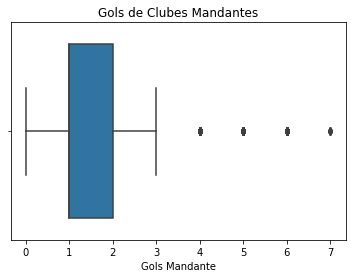

In [ ]:
sns.boxplot(data['Gols Mandante']).set_title("Gols de Clubes Mandantes")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gols de clubes Visitantes')

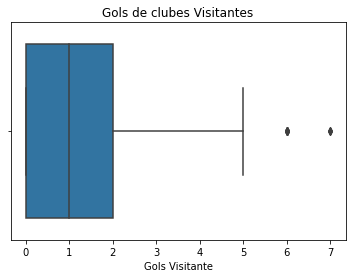

In [ ]:
sns.boxplot(data['Gols Visitante']).set_title("Gols de clubes Visitantes")

#Estatísticas de Clubes Vencedores

In [17]:
data_vencedores = data.groupby(['Vencedor']).size()
data_vencedores.sort_values(ascending=False)

Vencedor
-                  2040
São paulo           348
Cruzeiro            326
Santos              325
Grêmio              308
Internacional       303
Flamengo            299
Corinthians         296
Fluminense          292
Athlético-pr        291
Atlético-mg         282
Palmeiras           280
Botafogo-rj         231
Vasco               220
Goiás               214
Coritiba            187
Vitória             152
Figueirense         151
Ponte preta         150
Sport               129
Bahia               123
Paraná              104
São caetano         103
Juventude            96
Chapecoense          69
Guarani              63
Portuguesa           58
Avaí                 57
Náutico              54
Fortaleza            51
Paysandu             50
Criciúma             50
Ceará                40
Atlético-go          39
América-mg           38
Santa cruz           25
Gama                 21
Barueri              12
Santo andré          11
Brasiliense          10
Ipatinga              9
Csa    

Excluindo Empates

In [23]:
data_vencedores = data_vencedores.drop(labels=['-'])

In [24]:
data_vencedores.describe()

count     45.000000
mean     131.088889
std      116.459478
min        4.000000
25%       38.000000
50%       96.000000
75%      231.000000
max      348.000000
dtype: float64

Filtrar Clubes por quantidade de vitórias

In [25]:
#@title Quantidade de vitórias por clube
win = 100 #@param {type:"number"}

In [26]:
aux = data_vencedores > win
data_vencedores[aux].sort_values(ascending=False)

Vencedor
São paulo        348
Cruzeiro         326
Santos           325
Grêmio           308
Internacional    303
Flamengo         299
Corinthians      296
Fluminense       292
Athlético-pr     291
Atlético-mg      282
Palmeiras        280
Botafogo-rj      231
Vasco            220
Goiás            214
Coritiba         187
Vitória          152
Figueirense      151
Ponte preta      150
Sport            129
Bahia            123
Paraná           104
São caetano      103
dtype: int64

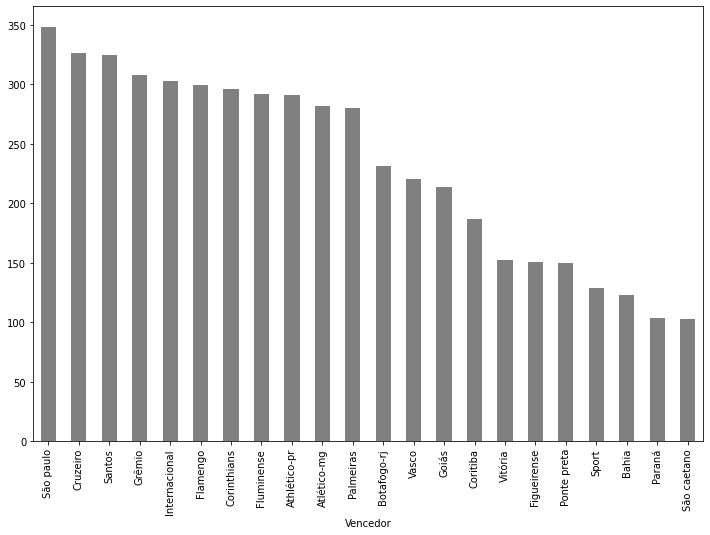

In [27]:
# gráfico de colunas
data_vencedores[aux].sort_values(ascending=False).plot.bar(rot=90,color='gray',figsize=(12,8))

##Estatística Estado Vencedor

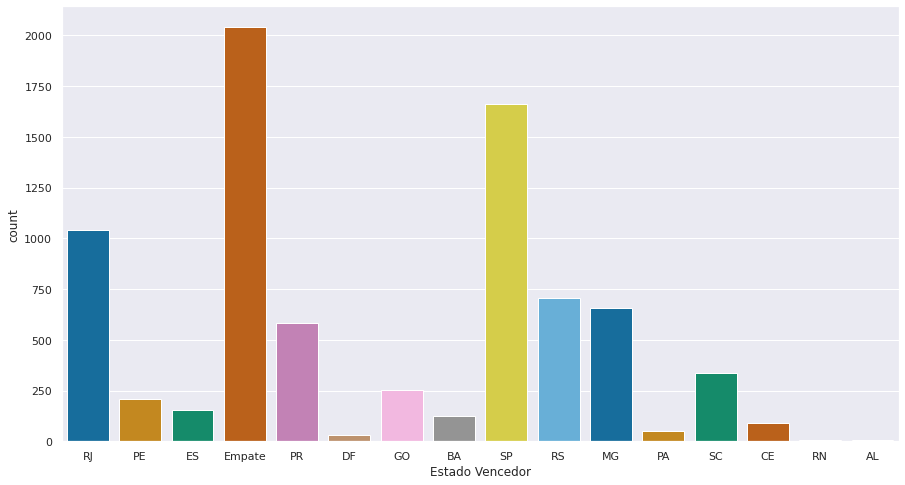

In [46]:
#Gráfico estado vencedor
# sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
sns.countplot(x='Estado Vencedor', data=data, palette='colorblind')

#Histogramas

Gols

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histograma Gols Mandante')

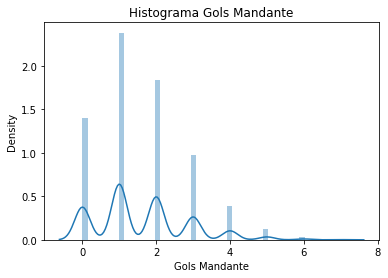

In [ ]:
sea.distplot(data['Gols Mandante']).set_title('Histograma Gols Mandante')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histograma Gols Visitante')

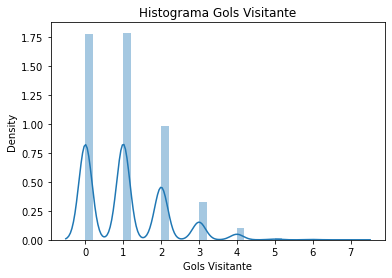

In [ ]:
sea.distplot(data['Gols Visitante']).set_title('Histograma Gols Visitante')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histograma Clubes Vencedores')

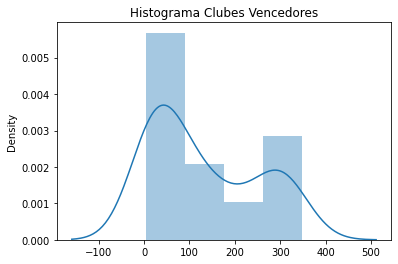

In [ ]:
sea.distplot(data_vencedores).set_title('Histograma Clubes Vencedores')

#Normalidade

In [47]:
stats.shapiro(data['Gols Mandante'])

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.8974671363830566, 0.0)

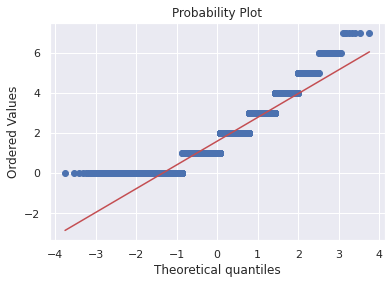

In [51]:
fig, ax = plt.subplots()
stats.probplot(data['Gols Mandante'], fit=True,   plot=ax)
plt.show()

In [49]:
stats.shapiro(data['Gols Visitante'])

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.8390491008758545, 0.0)

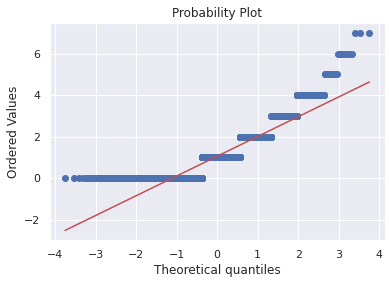

In [52]:
fig, ax = plt.subplots()
stats.probplot(data['Gols Visitante'], fit=True,   plot=ax)
plt.show()

In [50]:
stats.shapiro(data_vencedores)

(0.8595848679542542, 6.52250528219156e-05)

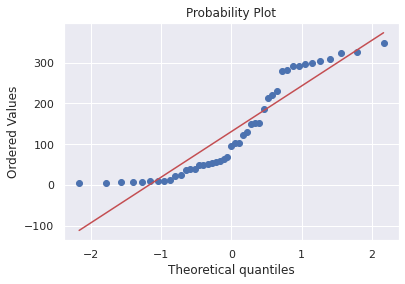

In [53]:
fig, ax = plt.subplots()
stats.probplot(data_vencedores, fit=True,   plot=ax)
plt.show()

# Cálculo Intervalo de Confiança a 95%

In [ ]:
#INTERVALO DE CONFIANÇA DO GOLS DOS TIMES MANDANTES
#data['Gols Mandante'].describe()
Zc = 1.96
n = data['Gols Mandante'].count()

varianciaMandante = st.pvariance(data['Gols Mandante'])
sigmaMandante = math.sqrt(varianciaMandante)

E = (Zc * sigmaMandante) / math.sqrt(n)

print('x +- E = 1,597 +-', round(E,3))


x +- E = 1,597 +- 0.028


In [ ]:
#INTERVALO DE CONFIANÇA DO GOLS DOS TIMES VISITANTES
varianciaVisitante = st.pvariance(data['Gols Visitante'])
sigmaVisitante = math.sqrt(varianciaVisitante)

EVisitante = (Zc * sigmaVisitante) / math.sqrt(n)

print('x +- E = 1,053 +-', round(EVisitante,3))


x +- E = 1,053 +- 0.023
